In [1]:
# Import Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Run the following code if you want to set up plotly for visualizations
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
# Code for mounting drive on Google Colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Load Train data to DataFrame
train = pd.read_csv('/content/drive/My Drive/train_V2.csv')

In [0]:
# Load Test Data to DataFrame
test = pd.read_csv('/content/drive/My Drive/test_V2.csv')

In [0]:
# Function for converting data types into memory non-intensive data types. Thereby making loading and memory usage faster.
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [7]:
train = reduce_mem_usage(train)

Memory usage of dataframe is 983.90 MB --> 339.28 MB (Decreased by 65.5%)


In [8]:
test = reduce_mem_usage(test)

Memory usage of dataframe is 413.18 MB --> 140.19 MB (Decreased by 66.1%)


In [9]:
# View first few values.
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000000,0,0,0,60,1241,0,0,0.000000,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.800003,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470001,0,0,0,57,0,0,0,0.000000,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.000000,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000000,0,0,0,47,0,0,0,0.000000,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.800003,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900002,0,0,0,75,0,0,0,0.000000,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.699997,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000000,0,0,0,45,0,1,1,58.529999,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.750000,2,0,0.1875


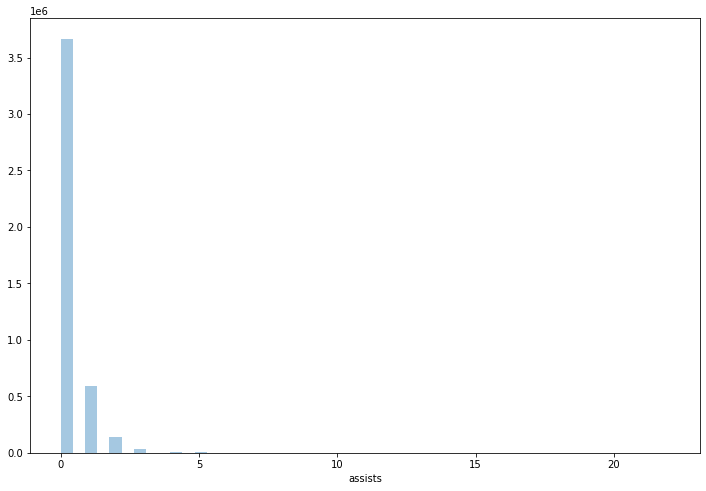

In [10]:
# Visualize Histogram for 'assists' column.
# You 'assist' when you have contributed in knocking down a player in the game.
plt.figure(figsize=(12,8))
sns.distplot(train['assists'],kde=False)

In [11]:
# Value distribution of 'assist' column
train['assists'].value_counts()

0     3667660
1      591883
2      137144
3       35640
4        9990
5        2892
6         976
7         387
8         185
9          84
10         48
11         27
12         20
13         16
15          7
14          2
17          2
21          1
20          1
22          1
Name: assists, dtype: int64

In [12]:
# Number of unique values on 'assist' column
train['assists'].unique()

array([ 0,  1,  3,  2,  4,  6,  5,  8,  9,  7, 13, 11, 12, 21, 10, 20, 14,
       17, 22, 15], dtype=int8)

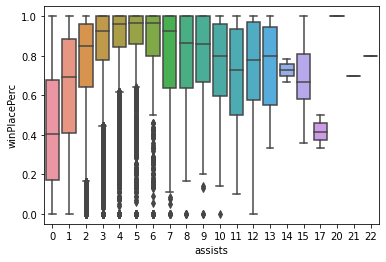

In [13]:
# Assist column doesn't seem to have ambiguos values
sns.boxplot(x='assists',y='winPlacePerc',data=train)

In [0]:
# Hence Assist column affects win place percentage.

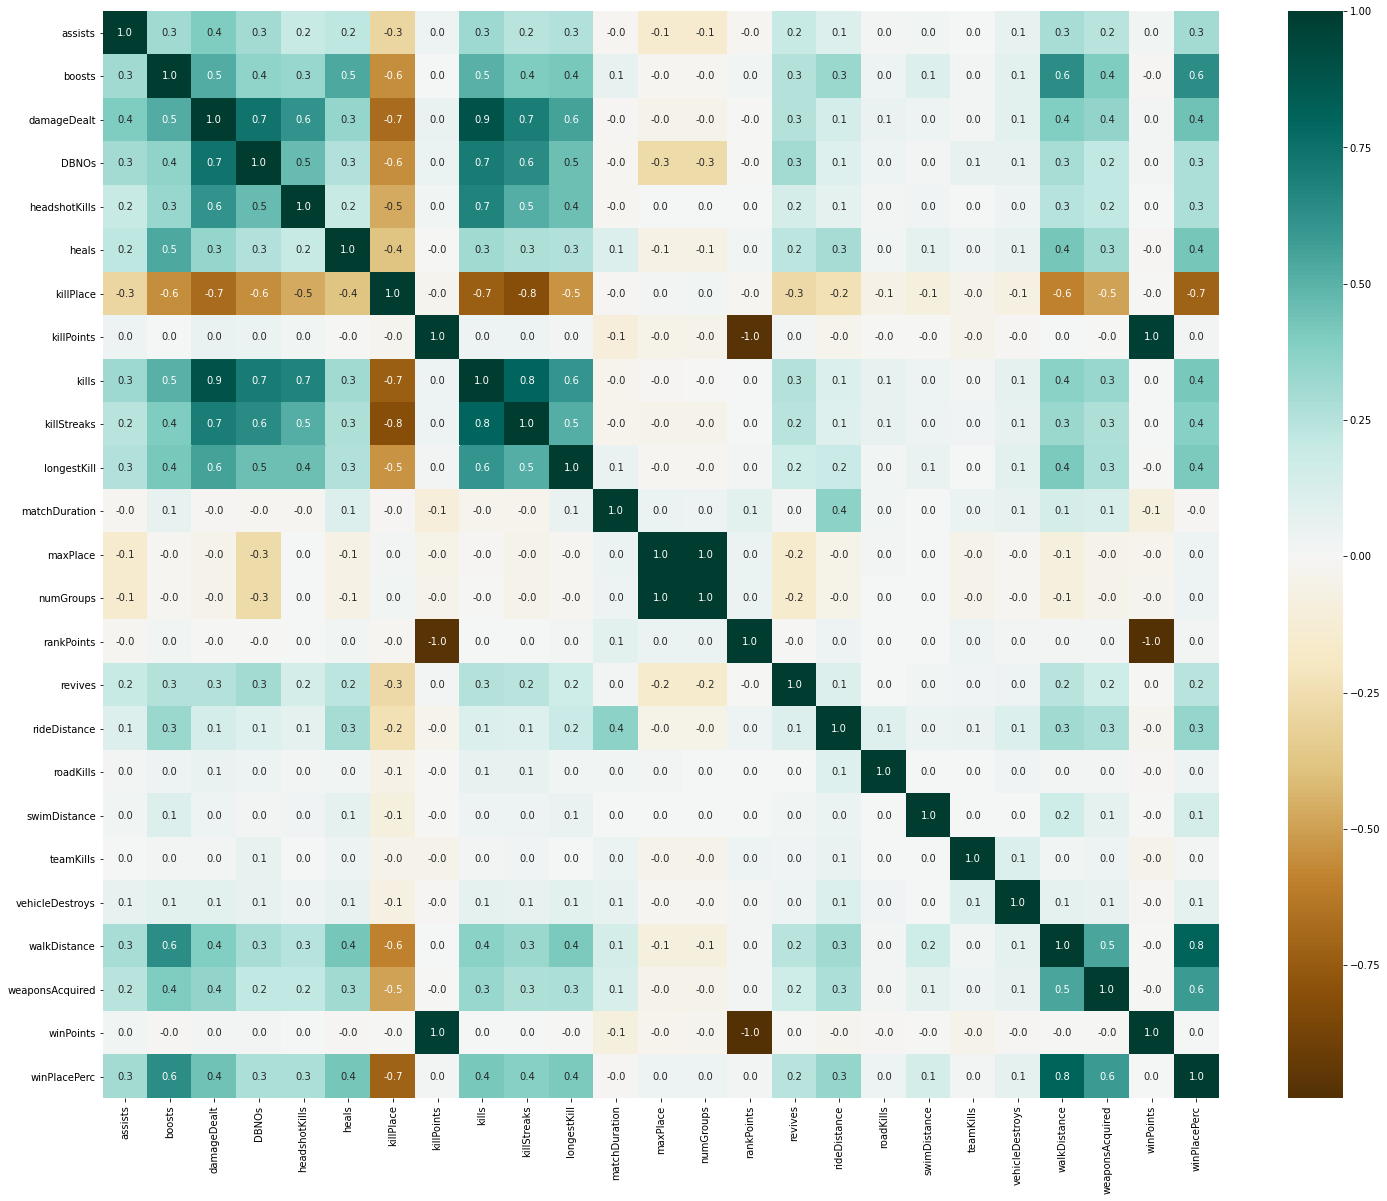

In [18]:
corr = train.corr()
f,ax = plt.subplots(figsize=(25, 20))
sns.heatmap(train.corr(), annot=True, fmt= '.1f',ax=ax, cmap="BrBG")
sns.set(font_scale=1.25)
plt.show()

Hence, there are no null values

In [14]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000000,0,0,0,60,1241,0,0,0.000000,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.800003,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470001,0,0,0,57,0,0,0,0.000000,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.000000,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000000,0,0,0,47,0,0,0,0.000000,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.800003,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900002,0,0,0,75,0,0,0,0.000000,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.699997,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000000,0,0,0,45,0,1,1,58.529999,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.750000,2,0,0.1875


In [0]:
# Drop unnecessary values
train.drop(['Id','groupId','matchId','matchDuration','rankPoints','numGroups','maxPlace','roadKills','winPoints'],axis=1,inplace=True)

In [16]:
# Columns of train DataFrame
train.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchType', 'revives', 'rideDistance', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPlacePerc'],
      dtype='object')

In [17]:
# Summary of the DataFrame
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 20 columns):
 #   Column           Dtype  
---  ------           -----  
 0   assists          int8   
 1   boosts           int8   
 2   damageDealt      float32
 3   DBNOs            int8   
 4   headshotKills    int8   
 5   heals            int8   
 6   killPlace        int8   
 7   killPoints       int16  
 8   kills            int8   
 9   killStreaks      int8   
 10  longestKill      float32
 11  matchType        object 
 12  revives          int8   
 13  rideDistance     float32
 14  swimDistance     float32
 15  teamKills        int8   
 16  vehicleDestroys  int8   
 17  walkDistance     float32
 18  weaponsAcquired  int16  
 19  winPlacePerc     float32
dtypes: float32(6), int16(2), int8(11), object(1)
memory usage: 199.3+ MB


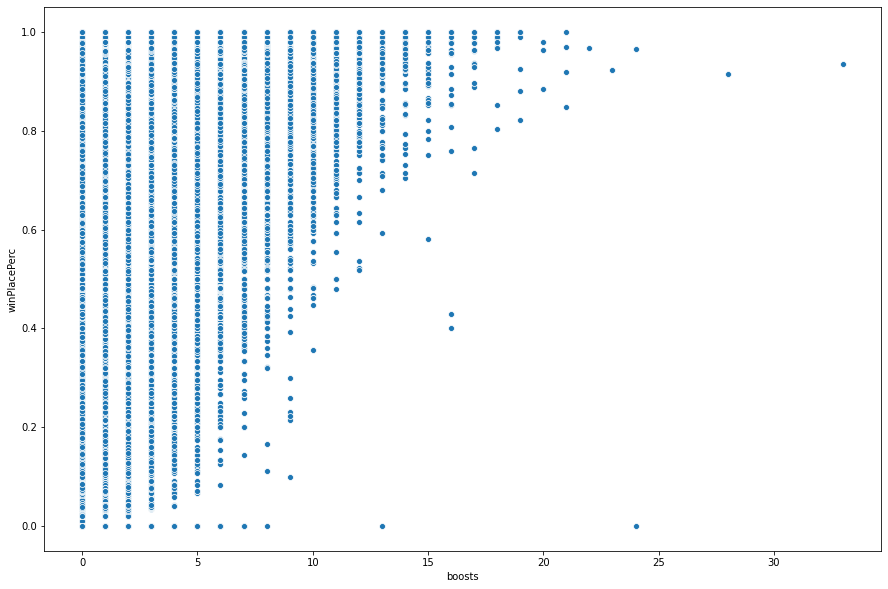

In [18]:
# Visualize scatterPlot to see trend if any between 'boosts' and 'winPlacePerc'
f,ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x='boosts',y='winPlacePerc',data=train)

In [0]:
# From the above scatter plot we can infer that generally more the boosts used, better the chance of winning.

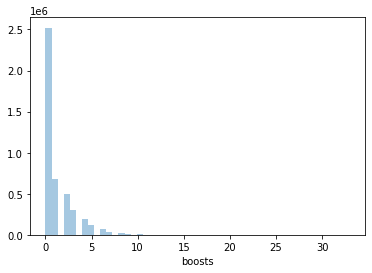

In [20]:
sns.distplot(train['boosts'],kde=False)

In [21]:
# See descriptive stats of the 'boosts' column
train['boosts'].describe()

count    4.446966e+06
mean     1.106908e+00
std      1.715794e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      3.300000e+01
Name: boosts, dtype: float64

In [22]:
# Range of unique values
train['boosts'].unique()

array([ 0,  1,  2,  3,  4,  6,  5,  9,  7,  8, 11, 10, 13, 14, 12, 21, 15,
       20, 16, 17, 33, 19, 18, 24, 28, 23, 22], dtype=int8)

In [23]:
# Subsetting part of DataFrame to catch anomalous cases
train[train['boosts']>20]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchType,revives,rideDistance,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
59311,1,21,254.600006,1,0,3,15,1402,2,2,75.669998,duo-fpp,0,852.5,0.00,0,0,3197.000000,5,0.9184
450791,0,33,787.700012,6,3,3,1,1676,8,1,106.300003,squad-fpp,0,0.0,0.00,0,0,2790.000000,5,0.9355
687032,0,21,978.299988,0,2,2,1,1000,11,1,446.500000,solo-fpp,0,5054.0,0.00,0,0,3739.000000,7,1.0000
1465177,0,24,746.299988,0,4,1,2,1415,7,1,182.899994,solo-fpp,0,2175.0,0.00,0,0,3650.000000,4,0.9663
1532989,0,28,0.000000,0,0,13,44,0,0,0,0.000000,solo-fpp,0,0.0,0.00,0,0,2488.000000,3,0.9149
1880943,0,21,22.049999,0,0,17,45,1313,0,0,0.000000,duo-fpp,4,0.0,0.00,0,0,1586.000000,4,0.8478
1973920,2,23,522.400024,2,2,7,4,1738,4,2,314.399994,squad-fpp,0,1760.0,0.00,0,0,2793.000000,3,0.9231
1978584,0,22,303.000000,0,2,0,8,0,3,2,204.000000,solo-fpp,0,0.0,17.92,0,0,2499.000000,9,0.9681
2621420,1,21,810.900024,0,2,2,1,0,7,2,257.899994,solo-fpp,0,2285.0,0.00,0,0,2207.000000,6,0.9688
3979434,0,24,0.000000,0,0,1,4,0,0,0,0.000000,solo,0,0.0,0.00,0,0,267.299988,8,0.0000


In [0]:
# Hence, boosts column doesn't have anomalous values and directly affects the output column.

In [25]:
train.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchType', 'revives', 'rideDistance', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPlacePerc'],
      dtype='object')

In [26]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,revives,rideDistance,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.306331e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,2.299348e+01,1.646590e-01,6.060923e+02,4.509240e+00,2.386841e-02,7.918208e-03,1.148517e+03,3.660488e+00,4.728141e-01
std,5.885731e-01,1.715794e+00,1.698869e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,5.147609e+01,4.721671e-01,1.496470e+03,3.023784e+01,1.673935e-01,9.261157e-02,1.180553e+03,2.456544e+00,3.068041e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,2.132000e+01,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.094000e+03,3.900000e+01,4.071000e+04,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,1.000000e+00


### Visualize Other columns for deriving useful insights

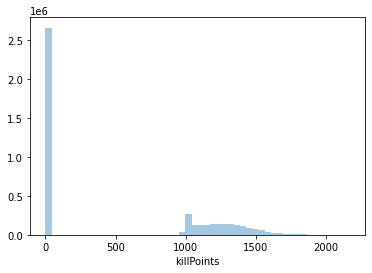

In [27]:
sns.distplot(train['killPoints'],kde=False)

In [0]:
arr = train['killPoints'].unique()

(0.0, 1000.0)

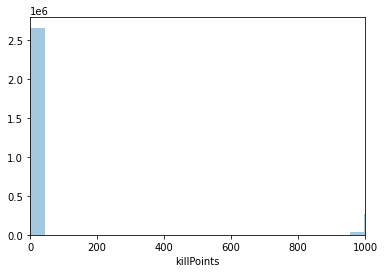

In [29]:
sns.distplot(train['killPoints'],kde=False)
plt.xlim((0,1000))

In [30]:
train[(train['killPoints']>40)&(train['killPoints']<1000)]['killPoints'].value_counts()

998    2559
999    2490
997    2461
995    2346
996    2305
       ... 
375       1
599       1
873       1
777       1
160       1
Name: killPoints, Length: 622, dtype: int64

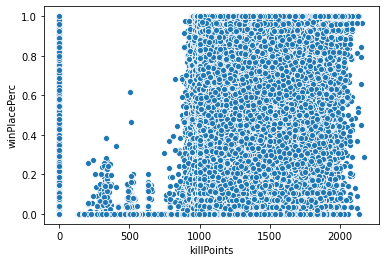

In [31]:
sns.scatterplot(x=train['killPoints'],y=train['winPlacePerc'])

In [32]:
train[train['killPoints']==0]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchType,revives,rideDistance,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
1,0,0,91.470001,0,0,0,57,0,0,0,0.000000,squad-fpp,0,0.004500,11.040,0,0,1434.000000,5,0.6400
2,1,0,68.000000,0,0,0,47,0,0,0,0.000000,duo,0,0.000000,0.000,0,0,161.800003,2,0.7755
3,0,0,32.900002,0,0,0,75,0,0,0,0.000000,squad-fpp,0,0.000000,0.000,0,0,202.699997,3,0.1667
4,0,0,100.000000,0,0,0,45,0,1,1,58.529999,solo-fpp,0,0.000000,0.000,0,0,49.750000,2,0.1875
5,0,0,100.000000,1,1,0,44,0,1,1,18.440001,squad-fpp,0,0.000000,0.000,0,0,34.700001,1,0.0370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446960,0,0,327.700012,3,2,0,4,0,4,3,90.250000,squad-fpp,0,180.399994,0.000,0,0,845.599976,3,0.2414
4446962,0,1,44.150002,0,0,0,69,0,0,0,0.000000,solo,0,0.000000,0.000,0,0,81.699997,6,0.2935
4446963,0,0,59.060001,0,0,0,66,0,0,0,0.000000,squad-fpp,0,0.000000,2.184,0,0,788.700012,4,0.4815
4446964,0,4,180.399994,1,1,2,11,0,2,1,98.500000,squad-fpp,2,0.000000,0.000,0,0,2748.000000,8,0.8000


In [0]:
# killPoints column doesn't seem to have an impact on final output. Hence, we will drop this column

In [0]:
train.drop('killPoints',inplace=True,axis=1)

In [35]:
train.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill', 'matchType',
       'revives', 'rideDistance', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPlacePerc'],
      dtype='object')

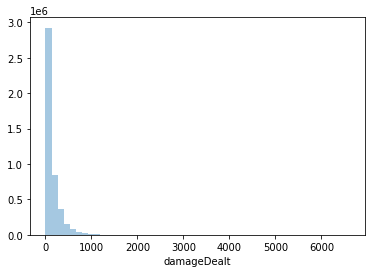

In [36]:
sns.distplot(train['damageDealt'],kde=False)

In [37]:
train['damageDealt'].unique().max()

6616.0

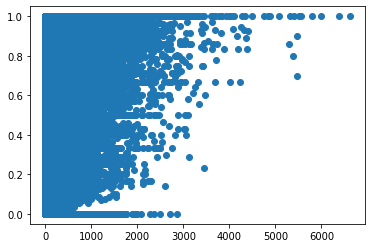

In [38]:
plt.scatter(x=train['damageDealt'],y=train['winPlacePerc'])

In [39]:
train[(train['damageDealt']>2000)&(train['damageDealt']<6000)]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchType,revives,rideDistance,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
2569,1,4,2325.0,13,8,2,1,21,2,192.100006,duo-fpp,1,2012.0,0.0,0,0,2697.000000,5,1.0000
5589,1,11,2033.0,13,4,7,1,17,2,327.700012,duo-fpp,2,1216.0,0.0,0,0,3235.000000,8,1.0000
12730,8,0,2069.0,21,6,12,7,13,2,150.199997,normal-squad-fpp,0,0.0,0.0,0,0,534.000000,25,0.8333
19531,9,0,2856.0,32,3,0,1,24,4,84.230003,normal-squad-fpp,0,0.0,0.0,0,0,1136.000000,20,0.8000
37505,1,2,2767.0,24,17,1,1,22,3,670.900024,squad,0,2589.0,0.0,0,0,3290.000000,7,0.9615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381091,7,0,2360.0,0,2,11,5,27,3,84.430000,normal-solo,0,0.0,0.0,1,0,295.299988,73,0.3333
4390901,2,4,2645.0,16,8,0,1,24,5,436.700012,squad,0,0.0,0.0,0,0,3180.000000,7,1.0000
4402706,3,0,2817.0,0,6,2,3,28,4,81.379997,normal-squad-fpp,0,0.0,0.0,0,0,1147.000000,31,0.4000
4420563,6,0,3297.0,0,5,4,1,30,5,203.399994,normal-solo-fpp,0,0.0,0.0,0,0,253.000000,32,1.0000


In [40]:
# Checking data types of all columns in the data frame
train.dtypes

assists               int8
boosts                int8
damageDealt        float32
DBNOs                 int8
headshotKills         int8
heals                 int8
killPlace             int8
kills                 int8
killStreaks           int8
longestKill        float32
matchType           object
revives               int8
rideDistance       float32
swimDistance       float32
teamKills             int8
vehicleDestroys       int8
walkDistance       float32
weaponsAcquired      int16
winPlacePerc       float32
dtype: object

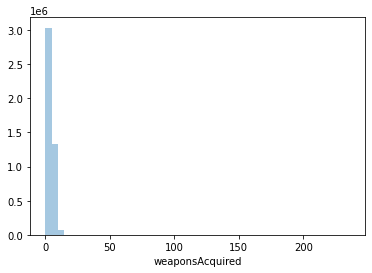

In [41]:
sns.distplot(train['weaponsAcquired'],kde=False)

In [42]:
train['weaponsAcquired'].unique()

array([  1,   5,   2,   3,   6,   4,   9,   7,   0,   8,  11,  10,  13,
        14,  43,  15,  12,  28,  16,  21,  22,  18,  25,  26,  19,  24,
        23,  20,  17,  30,  36,  38,  34,  46,  33,  29,  50,  52,  37,
        48,  27,  41,  44,  45,  61,  42,  39,  63,  71,  31,  35,  59,
        55,  72,  32,  67,  40,  49, 128,  53,  47,  56,  60,  70,  51,
        80,  64,  62,  65,  66,  54,  68,  77,  69, 102,  95,  83,  94,
        78,  96,  57,  76, 167, 177, 153,  75,  87,  85, 236,  58,  74,
        88,  73,  81,  97,  89,  92], dtype=int16)

In [0]:
# It is not possible for a normal player to pick up more than 30 to 40  weapons in a single game. Hence, let us drop those records as they might be hackers.

In [0]:
train = train[train['weaponsAcquired']<45]

In [45]:
train['weaponsAcquired'].unique()

array([ 1,  5,  2,  3,  6,  4,  9,  7,  0,  8, 11, 10, 13, 14, 43, 15, 12,
       28, 16, 21, 22, 18, 25, 26, 19, 24, 23, 20, 17, 30, 36, 38, 34, 33,
       29, 37, 27, 41, 44, 42, 39, 31, 35, 32, 40], dtype=int16)

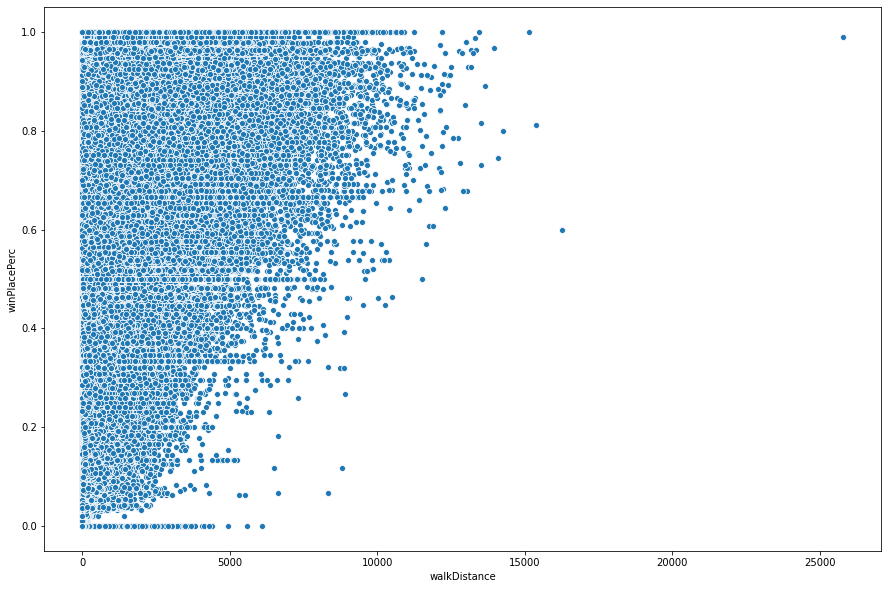

In [46]:
f,ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x=train['walkDistance'],y=train['winPlacePerc'])


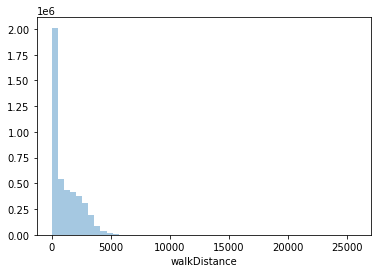

In [47]:
sns.distplot(train['walkDistance'],kde=False)

In [0]:
# We can see from the above scatter plot that some people have won even without walking alittle which is not p[ossible. Hence, we will discard those results]

In [0]:
# Feature Engineering
train['totalDistance'] = train['walkDistance']+train['swimDistance']+train['rideDistance']
train.drop(['walkDistance','swimDistance','rideDistance'],axis=1,inplace=True)

In [50]:
# Display last few columns
train.tail()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchType,revives,teamKills,vehicleDestroys,weaponsAcquired,winPlacePerc,totalDistance
4446961,0,0,0.000000,0,0,0,74,0,0,0.00,squad-fpp,0,0,0,3,0.1786,2311.000000
4446962,0,1,44.150002,0,0,0,69,0,0,0.00,solo,0,0,0,6,0.2935,81.699997
4446963,0,0,59.060001,0,0,0,66,0,0,0.00,squad-fpp,0,0,0,4,0.4815,790.884033
4446964,0,4,180.399994,1,1,2,11,2,1,98.50,squad-fpp,2,0,0,8,0.8000,2748.000000
4446965,0,2,268.000000,0,0,1,18,2,1,78.25,solo-fpp,0,0,0,5,0.5464,2613.000000


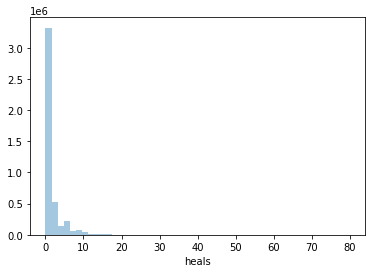

In [51]:
sns.distplot(train['heals'],kde=False)

In [52]:
train['heals'].unique()

array([ 0,  5,  2, 14, 12,  1,  8,  3,  4,  6,  9, 13,  7, 24, 10, 15, 25,
       11, 18, 17, 20, 16, 29, 23, 19, 21, 22, 27, 28, 32, 47, 26, 31, 30,
       43, 33, 37, 34, 38, 52, 35, 42, 48, 40, 41, 44, 39, 45, 36, 61, 46,
       57, 63, 50, 55, 49, 59, 54, 51, 56, 73, 80, 62], dtype=int8)

In [0]:
train = train[train['heals']<40]

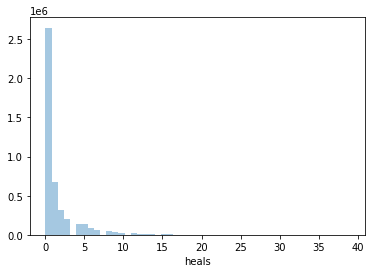

In [54]:
sns.distplot(train['heals'],kde=False)

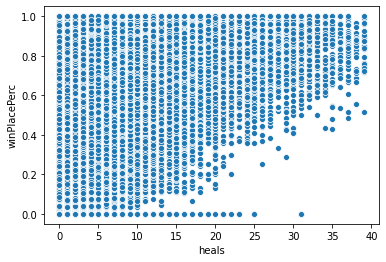

In [55]:
sns.scatterplot(x=train['heals'],y=train['winPlacePerc'])

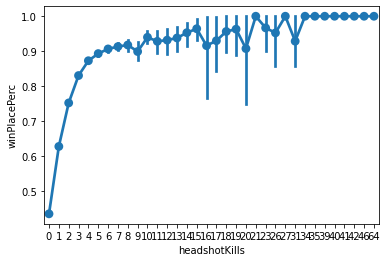

In [56]:
sns.pointplot(x='headshotKills',y='winPlacePerc',data=train)

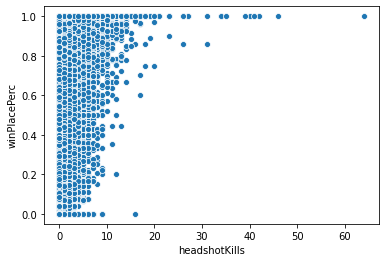

In [57]:
sns.scatterplot(x='headshotKills',y='winPlacePerc',data=train)

In [0]:
# Some hackers are having an insane amount of 60 headshot kills which is not possible.

In [0]:
train = train[train['headshotKills']<40]

In [60]:
train.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchType,revives,teamKills,vehicleDestroys,weaponsAcquired,winPlacePerc,totalDistance
0,0,0,0.000000,0,0,0,60,0,0,0.000000,squad-fpp,0,0,0,1,0.4444,244.800003
1,0,0,91.470001,0,0,0,57,0,0,0.000000,squad-fpp,0,0,0,5,0.6400,1445.044556
2,1,0,68.000000,0,0,0,47,0,0,0.000000,duo,0,0,0,2,0.7755,161.800003
3,0,0,32.900002,0,0,0,75,0,0,0.000000,squad-fpp,0,0,0,3,0.1667,202.699997
4,0,0,100.000000,0,0,0,45,1,1,58.529999,solo-fpp,0,0,0,2,0.1875,49.750000


In [61]:
train['kills'].unique()

array([ 0,  1,  4,  2,  9,  3,  5,  6,  8,  7, 14, 13, 15, 12, 21, 11, 10,
       17, 20, 24, 18, 16, 22, 19, 23, 27, 25, 35, 26, 30, 39, 33, 29, 34,
       36, 31, 38, 28, 66, 37, 41, 40, 43, 53, 45, 46, 49, 32], dtype=int8)

In [62]:
train['killStreaks'].unique()

array([ 0,  1,  2,  4,  3,  5,  6,  7, 10, 14,  8,  9, 11, 12, 13, 16, 18,
       20], dtype=int8)

In [63]:
train['longestKill'].describe()

count    4.446562e+06
mean     2.298812e+01
std      5.145899e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.131000e+01
max      1.094000e+03
Name: longestKill, dtype: float64

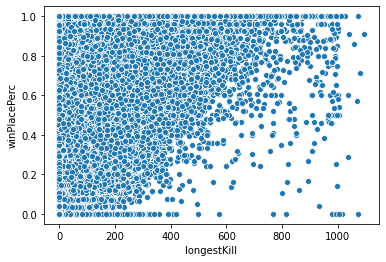

In [64]:
# ScatterPlot
sns.scatterplot(x=train['longestKill'],y=train['winPlacePerc'])

In [65]:
train.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill', 'matchType',
       'revives', 'teamKills', 'vehicleDestroys', 'weaponsAcquired',
       'winPlacePerc', 'totalDistance'],
      dtype='object')

In [0]:
train = train[train['longestKill']<800]

In [68]:
train['headshotKills'].max()

39

In [0]:
# Make a copy of the DataFrame
Train = train.copy(deep=True)
train.drop(((train['totalDistance']<100)&(train['kills']>2)).index,axis=0,inplace=True)

In [71]:
train.index

Int64Index([], dtype='int64')

In [72]:
Train.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchType,revives,teamKills,vehicleDestroys,weaponsAcquired,winPlacePerc,totalDistance
0,0,0,0.000000,0,0,0,60,0,0,0.000000,squad-fpp,0,0,0,1,0.4444,244.800003
1,0,0,91.470001,0,0,0,57,0,0,0.000000,squad-fpp,0,0,0,5,0.6400,1445.044556
2,1,0,68.000000,0,0,0,47,0,0,0.000000,duo,0,0,0,2,0.7755,161.800003
3,0,0,32.900002,0,0,0,75,0,0,0.000000,squad-fpp,0,0,0,3,0.1667,202.699997
4,0,0,100.000000,0,0,0,45,1,1,58.529999,solo-fpp,0,0,0,2,0.1875,49.750000


In [0]:
Train.drop(Train[(Train['totalDistance'] == 0)].index, inplace=True)

In [75]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4348967 entries, 0 to 4446965
Data columns (total 17 columns):
 #   Column           Dtype  
---  ------           -----  
 0   assists          int8   
 1   boosts           int8   
 2   damageDealt      float32
 3   DBNOs            int8   
 4   headshotKills    int8   
 5   heals            int8   
 6   killPlace        int8   
 7   kills            int8   
 8   killStreaks      int8   
 9   longestKill      float32
 10  matchType        object 
 11  revives          int8   
 12  teamKills        int8   
 13  vehicleDestroys  int8   
 14  weaponsAcquired  int16  
 15  winPlacePerc     float32
 16  totalDistance    float32
dtypes: float32(4), int16(1), int8(11), object(1)
memory usage: 186.6+ MB


In [76]:
Train['totalDistance'].max()

41270.1015625

### Drop unnecessary columns

In [0]:
Train.drop(Train[(Train['totalDistance'] > 30000)].index, inplace=True)

In [0]:
Train.drop('teamKills',axis=1,inplace=True)

### One-hot encoding

In [0]:
match_type = pd.get_dummies(Train['matchType'],drop_first=True)

In [0]:
Train.drop(['matchType'],axis=1,inplace=True)

In [0]:
train = pd.concat([Train,match_type],axis=1)

In [84]:
train.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,revives,vehicleDestroys,weaponsAcquired,winPlacePerc,totalDistance,crashtpp,duo,duo-fpp,flarefpp,flaretpp,normal-duo,normal-duo-fpp,normal-solo,normal-solo-fpp,normal-squad,normal-squad-fpp,solo,solo-fpp,squad,squad-fpp
0,0,0,0.000000,0,0,0,60,0,0,0.000000,0,0,1,0.4444,244.800003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,91.470001,0,0,0,57,0,0,0.000000,0,0,5,0.6400,1445.044556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,68.000000,0,0,0,47,0,0,0.000000,0,0,2,0.7755,161.800003,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,32.900002,0,0,0,75,0,0,0.000000,0,0,3,0.1667,202.699997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,100.000000,0,0,0,45,1,1,58.529999,0,0,2,0.1875,49.750000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Split data into Train and Test set

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(train.drop('winPlacePerc',axis=1),train['winPlacePerc'],test_size=0.3,random_state=101)

## Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model = LinearRegression()

In [92]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predictions = model.predict(X_test)

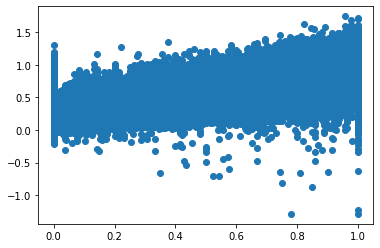

In [95]:
plt.scatter(y_test,predictions)

In [0]:
from sklearn import metrics

In [97]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.10860348
MSE: 0.021333106
RMSE: 0.14605857


In [100]:
type(y_test)

pandas.core.series.Series

In [106]:
arr = list(y_test)
print(arr[0:5])

[0.7958999872207642, 0.0, 0.5870000123977661, 0.6538000106811523, 0.4255000054836273]


In [107]:
print(predictions[0:5])

[0.70989645 0.26329654 0.6529609  0.63956565 0.45325172]


# Done